In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [34]:
file = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\house-votes-84.data'
data = pd.read_csv(file, header=None)
# arreglo
dataset = data.values

In [35]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [36]:
X = X.astype(str)

In [37]:
def load_dataset(filename):
    # Cargamos el Dataframe
    data = pd.read_csv(filename, header=None)
    # Generamos un arreglo
    dataset = data.values
    # Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # Forzamos que X sea string 
    X = X.astype(str)
    return X, y

In [38]:
# Cargamos el dataset
X, y = load_dataset(file)

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (291, 16) (291,)
Test (144, 16) (144,)


In [39]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [40]:

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [41]:
# Preparamos los datos de entrada o características
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparamos los datos de salida o target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [42]:
#chi
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [43]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 23.312997
Característica 1: 1.325093
Característica 2: 0.631398
Característica 3: 8.277333
Característica 4: 8.550505
Característica 5: 8.766482
Característica 6: 4.309456
Característica 7: 9.574622
Característica 8: 8.995795
Característica 9: 6.561534
Característica 10: 1.992072
Característica 11: 0.445863
Característica 12: 6.310168
Característica 13: 10.027798
Característica 14: 8.766586
Característica 15: 3.442867


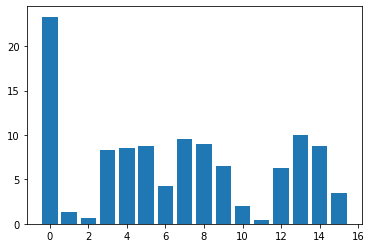

In [44]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [45]:
#Selección de características de información mutua (Mutual Information)
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [46]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 0.026573
Característica 1: 0.000000
Característica 2: 0.042229
Característica 3: 0.093987
Característica 4: 0.121639
Característica 5: 0.081220
Característica 6: 0.060215
Característica 7: 0.182112
Característica 8: 0.110840
Característica 9: 0.086990
Característica 10: 0.000000
Característica 11: 0.000000
Característica 12: 0.021063
Característica 13: 0.091091
Característica 14: 0.083054
Característica 15: 0.026349


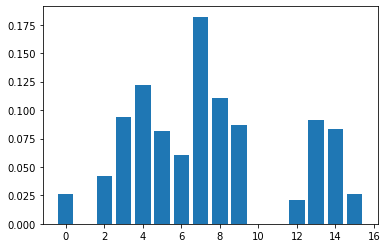

In [47]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()